In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np # Линейная алгебра
import pandas as pd # Обработка и анализ данных
from wordcloud import WordCloud # Облако тегов
from wordcloud import STOPWORDS # Останавливает слова
import nltk # Символьная и статистическая обработка естественного языка
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns # Статистическая визуализация данных
import scikitplot as skplt #
from sklearn.model_selection import train_test_split # Разделяет массивы и матрицы в рандомные train and test subsets 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
# CountVectorizer - Преобразование коллекции текстовых документов в матрицу подсчета токенов
# TfidfTransformer - Преобразование матрицы отсчета в нормализованное представление tf или tf-idf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #класс оценок
# Accuracy Score - вычисляет точность подмножества: набор меток, предсказанных для образца
# Confusion Matrix - матрица ошибок
# Classification Report - текстовый отчет, показывающий основные показатели классификации


#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import os
#print(os.listdir("../input"))

# Read Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# , encoding = 'latin-1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dev/Emails_analysis_labeled_utf8.CSV") 

# Show Data

In [ ]:
df.head(11)

,Betreff,Text,Von: (Name),Von: (Adresse),Von: (Typ),An: (Name),An: (Adresse),An: (Typ),CC: (Name),CC: (Adresse),CC: (Typ),BCC: (Name),BCC: (Adresse),BCC: (Typ),Abrechnuengsinformationen,Kategorien,Reisekilometer,Vertrauelichkeit,Wichtigkeit,Spam,Tags
0,"JF ""Deep dive"" GEHE AKADEMIE/ Sylvenstein - Of...",Besprechueng offener Fragen/ weiterer Verlauef...,Piehl Thorsten,Thorsten.Piehl@gehe.de,SMTP,Schneil Goenna;Dittor Maria;Kraiser Iris;Meint...,Goenna.Schneil@gehe.de;Maria.Dittor@gehe.de;Ir...,SMTP;SMTP;SMTP;SMTP;SMTP;SMTP;SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Normal,1,['Spam']
1,Re: NEueER Banner Lifescan // GEHE AKADEMIE //...,"Gueten Morgen Daniela,\r\nbin wieder zuerueck ...",Chris Guenter,cg@wacg.de,SMTP,"Miksch, Daniela",Daniela.Miksch@alliance-healthcare.de,SMTP,"Dittor, Maria;Piehl, Thorsten;pp@wacg.de;info@...",maria.dittor@gehe.de;Thorsten.Piehl@gehe.de;pp...,SMTP;SMTP;SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Normal,1,['Spam']
2,Re: Bannerplatzierueng Ende Aueguest // Anfang...,"Schoenen gueten Morgen zuesammen, hi Maria,\r\...",Chris Guenter,cg@wacg.de,SMTP,Pauela Pantleon,pp@wacg.de,SMTP,Dittor Maria;info@sylvenstein.com;Kraiser Iris...,Maria.Dittor@gehe.de;info@sylvenstein.com;Iris...,SMTP;SMTP;SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Normal,1,"['Spam', 'Apps']"
3,AW: NEueER Banner Lifescan // GEHE AKADEMIE //...,"Hallo zuesammen, \r\n\r\n \r\n\r\nggf. koennte...","Miksch, Daniela",Daniela.Miksch@alliance-healthcare.de,SMTP,"Dittor, Maria;Piehl, Thorsten;'Chris Guenter';...",maria.dittor@gehe.de;Thorsten.Piehl@gehe.de;cg...,SMTP;SMTP;SMTP;SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Hoch,0,"['Gehe', 'Banner']"
4,WG: [EXTERNAL] Reportings,"Liebes Sylvenstein Team,\r\n\r\n \r\n\r\nbitte...",Schneil Goenna,Goenna.Schneil@gehe.de,SMTP,'info@sylvenstein.com',info@sylvenstein.com,SMTP,Schneil Goenna;Dittor Maria,Goenna.Schneil@gehe.de;Maria.Dittor@gehe.de,SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Hoch,0,"['Gehe', 'Banner']"
5,AW: [EXTERNAL] Reportings,"Hallo zuesammen, \r\n\r\n \r\n\r\nvielen Dank ...",Dittor Maria,Maria.Dittor@gehe.de,SMTP,info@sylvenstein.com,info@sylvenstein.com,SMTP,Kraiser Iris;Piehl Thorsten,Iris.Kraiser@gehe.de;Thorsten.Piehl@gehe.de,SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Normal,0,"['Gehe', 'Banner']"
6,Re: Bannerplatzierueng Ende Aueguest // Anfang...,"Hallo Maria, \r\n\r\nich schauee mir das am Mo...",Pauela Pantleon,pp@wacg.de,SMTP,Dittor Maria,Maria.Dittor@gehe.de,SMTP,Chris Guenter;info@sylvenstein.com;Kraiser Iri...,cg@wacg.de;info@sylvenstein.com;Iris.Kraiser@g...,SMTP;SMTP;SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Normal,0,"['Gehe', 'Banner']"
7,WG: Bannerplatzierueng Ende Aueguest // Anfang...,"Hallo zuesammen, \r\n\r\n \r\n\r\nwie mittlerw...",Dittor Maria,Maria.Dittor@gehe.de,SMTP,Chris Guenter;Pauela Pantleon;info@sylvenstein...,cg@wacg.de;pp@wacg.de;info@sylvenstein.com,SMTP;SMTP;SMTP,Kraiser Iris;Piehl Thorsten,Iris.Kraiser@gehe.de;Thorsten.Piehl@gehe.de,SMTP;SMTP,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Normal,1,['Spam']
8,GEHE AKADEMIE: Teilnahmebestaetigueng,"Hallo Herr Giebel, hallo Herr Fuehrmann,\r\n\r...",Kraiser Iris,Iris.Kraiser@gehe.de,SMTP,info@sylvenstein.com;fuehrmann@sylvenstein.com,info@sylvenstein.com;fuehrmann@sylvenstein.com,SMTP;SMTP,Piehl Thorsten,Thorsten.Piehl@gehe.de,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Hoch,0,"['Gehe', 'Reporting']"
9,WG: Infos / uepdates zuem Reporting,\r\n\r\n \r\n\r\nVon: Schneil Goenna [mailto:...,Philipp Brauen,brauen@sylvenstein.com,SMTP,info@sylvenstein.com,info@sylvenstein.com,SMTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Hoch,0,"['Gehe', 'Reporting']"


In [ ]:
#df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.columns = ['Label', 'Message']
df.head()

# Splitting the labels and the data separately

In [ ]:
df_labels = df['Spam']
df_labels.head(11)

0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
Name: Spam, dtype: int64

# Data Visualization
 - To check the most used word in Ham sms and Spam SMS
 - To visualize the percentage of Ham and Spam SMS

In [ ]:
# Stopwords (Шумовые слова)
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('german')
stopwords = stopwords + STOPWORDS

ham_dataset = df[df.Spam == 0]
spam_dataset = df[df.Spam == 1]
ham_words = ' '
spam_words = ' '

for words in ham_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)

AttributeError: ignored

## Plotting ham and spam data % in pie chart

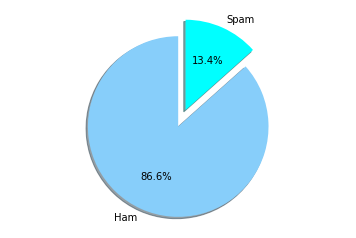

In [ ]:
count_Class = pd.value_counts(df.Label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

# Splitting the Test and Train Data 

In [ ]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(3733, 2)
(1839, 2)

The Trainset consists of 3733 records and 2 features

The Testset consists of 1839 records and 2 features


# Extracting N-grams from the Text Data

In [ ]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Message)

# preparing for training set
x_train_df = countvect.transform(train_set.Message)

# preparing for test set
x_test_df = countvect.transform(test_set.Message)

# Data Model

The Algorithms used below in this notebooks are:

 - Naive Bayes
 - K-Nearest
 - Decision Tree
 - Support Vector Machine
 - Random Forest

# Naive Bayes classifier 

The accuracy of Naive Bayes clasifier is 97.87928221859707%

 [[1581    6]
 [  33  219]]


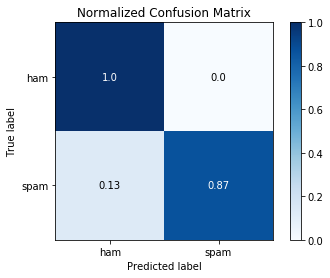

In [ ]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()

# K-Nearest Neighbors algorithm


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of K-Nearest Neighbors algorithm is 89.07014681892332%

 [[1587    0]
 [ 201   51]]


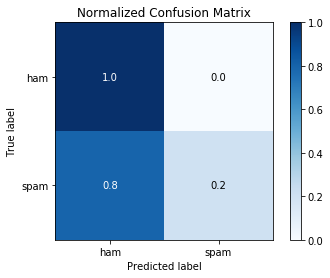

In [ ]:
#KNN = KNeighborsClassifier(metric = 'euclidean')
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize = True)
plt.show()

# Decision Tree learning

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']

The accuracy of Decision Tree learning is 96.08482871125612%

 [[1576   11]
 [  61  191]]


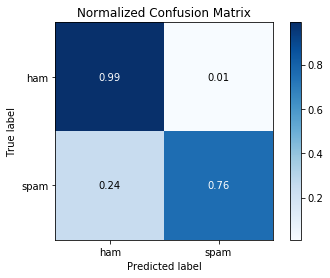

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize = True)
plt.show()

# Support Vector Machine (SVM)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of Support Vector Machine (SVM) is 86.2969004893964%

 [[1587    0]
 [ 252    0]]


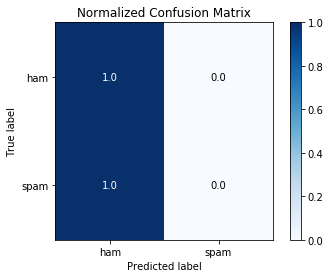

In [ ]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize = True)
plt.show()

# Random Forest

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of Random Forest is 95.86731919521479%

 [[1587    0]
 [  76  176]]


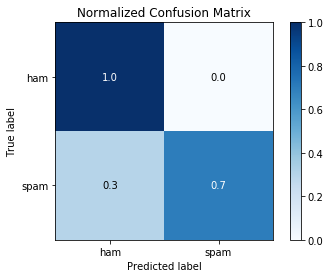

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
# n_estimators - количество деревьев в лесе
# oob_score - использовать ли образцы вне примеров для оценки точности обобщения
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize = True)
plt.show()

# Method Comparison

,Algorithms,Percentage
0,Naive Bayes,97.879282
1,K-Nearest Neighbors algorithm,89.070147
2,Decision Tree learning,96.084829
3,Support Vector Machine (SVM),86.296900
4,Random Forest,95.867319


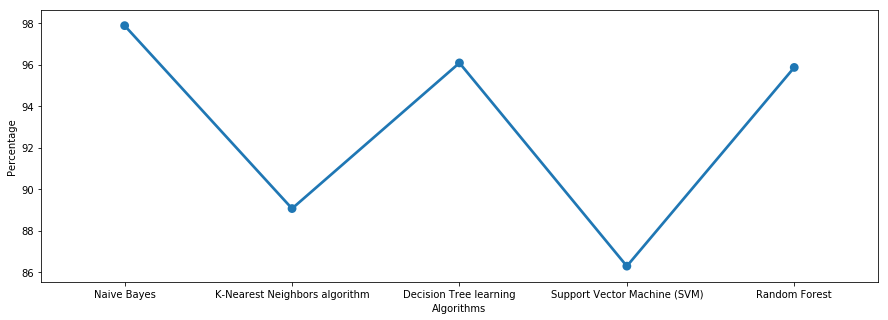

In [ ]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);

# ROC Accuracy

In [ ]:
#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = test_set.Label.tolist()
predicted_values = predicted_values_NB.tolist()
test_prediction = [1 if pred=="spam" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="spam" else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.9326334503555676


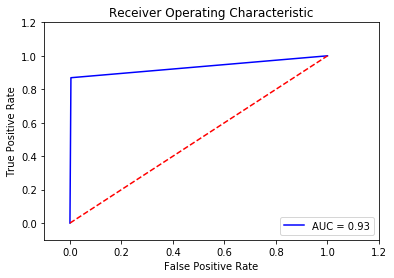

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()